In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd 

In [2]:
song_dir = 'DEAM/annotations/annotations_avg_per_song/song_level/'
df = pd.read_csv(song_dir + 'static_annotations_averaged_songs_1_2000.csv',skipinitialspace=True)
print(list(df.columns.values))

['song_id', 'valence_mean', 'valence_std', 'arousal_mean', 'arousal_std']


In [3]:
arousal_mean= df['arousal_mean']
valence_mean= df['valence_mean']

arousal_std = df['arousal_std']
arousal_std = df['valence_std']

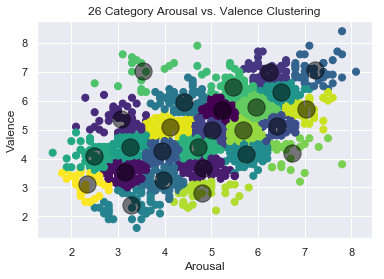

In [4]:
# KMEANS CLUSTERING using valence and arousal scores 
# create arousal, valence coordinates
X = list(zip(arousal_mean, valence_mean))

kmeans = KMeans(n_clusters=26)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt_X =list(zip(*X))

plt.scatter(plt_X[0], plt_X[1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('26 Category Arousal vs. Valence Clustering')
plt.xlabel('Arousal')
plt.ylabel('Valence')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);


In [5]:
# # KMEANS CLUSTERING using valence and arousal scores 
# # create arousal, valence coordinates
# X = list(zip(arousal_mean, valence_mean))

# kmeans = KMeans(n_clusters=6)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# plt_X =list(zip(*X))

# plt.scatter(plt_X[0], plt_X[1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.title('6 Category Arousal vs. Valence Clustering')
# plt.xlabel('Arousal')
# plt.ylabel('Valence')

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);



In [6]:
# emotions assigned 
print (y_kmeans)

[ 1  1  0 ... 13 21 19]


In [7]:
df.insert(1, "emotion assignment", y_kmeans, True) 

In [8]:
df['arousal_mean'] =df['arousal_mean'].apply(lambda x: x*10/9)
df['valence_mean'] =df['valence_mean'].apply(lambda x: x*10/9)
df['arousal_std']  =df['arousal_std'].apply(lambda x: x*10/9)
df['valence_std']  =df['valence_std'].apply(lambda x: x*10/9)


In [9]:
df.to_csv('26_category_emotions.csv')

In [10]:
df.sort_values(by=['emotion assignment','song_id'], inplace=True, ascending=True)
df = df.reset_index()

df['v_avg'] = df.groupby('emotion assignment').mean()['valence_mean']
df['a_avg'] = df.groupby('emotion assignment').mean()['arousal_mean']

In [11]:
df.sort_values(by=['emotion assignment','song_id'], inplace=True, ascending=True)
df = df.reset_index()



In [12]:
# df['song_id'].loc[df['emotion assignment'] == 5]



In [13]:
emotions = ['Peace', 'Affection', 'Esteem', 'Anticipation', 'Engagement',
            'Confidence','Happiness','Pleasure','Excitement','Surprise',
            'Sympathy','Doubt/Confusion','Disconnection','Fatigue',
            'Embarrassment','Yearning','Disapproval','Aversion',
            'Annoyance','Anger','Sensitivity','Sadness','Disquietment',
            'Fear','Pain','Suffering']

# basic = [emotions[6], emotions[9], emotions[17], emotions[19], emotions[21], emotions[23]]
avg_df = df[['v_avg','a_avg']].head(26)
avg_df.insert(2, "emotion", emotions, True) 


In [14]:
# ordered by groups 
avg_df.sort_values(['v_avg', 'a_avg'], ascending=True)

,v_avg,a_avg,emotion
11,2.647287,3.637209,Doubt/Confusion
22,3.117284,5.342593,Disquietment
25,3.472222,2.604167,Suffering
9,3.611993,4.416226,Surprise
1,3.945602,3.503472,Affection
2,4.077037,5.351111,Esteem
15,4.546296,2.764815,Yearning
12,4.612346,6.372487,Disconnection
20,4.638889,7.476852,Sensitivity
7,4.719101,4.374532,Pleasure


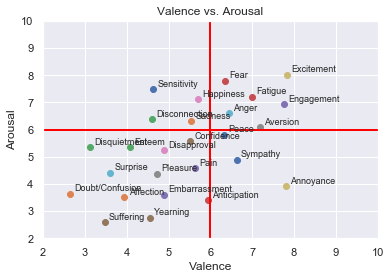

In [15]:
import matplotlib.pyplot as plt

plt.figure()
# Set x-axis range
plt.xlim((2,10))
# Set y-axis range
plt.ylim((2,10))
# Draw lines to split quadrants
plt.plot([6,6],[2,10], linewidth=2, color='red' )
plt.plot([2,10],[6,6], linewidth=2, color='red' )
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs. Arousal')

for i, emot in enumerate(avg_df['emotion']): 
    x = avg_df['v_avg'].iloc[i]
    y = avg_df['a_avg'].iloc[i]
    
    plt.scatter(x,y)
    plt.text(x+0.1, y+0.1, emot, fontsize=9)

plt.show()